# Linear Regression Algorithm


In [1]:
# Filtering out the warnings and importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset and Check Details
### 1. Load the Dataset

In [2]:
df = pd.read_csv('E:\\DataScience videos\\Dataset\\car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 2. Check the Size of Data

In [3]:
df.shape

(398, 9)

### 3. Check various DataType

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# Change dtype of 'hp' as it is not numeric

df.hp = pd.to_numeric(df.hp, errors='coerce').fillna(0, downcast='infer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


### 4. Check Statistical Information of Data

In [6]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 5. Check the Missing Value in Data

In [7]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

## Data Visualization and Analysis
### 1. Plot a Pair Plot and Note down important points

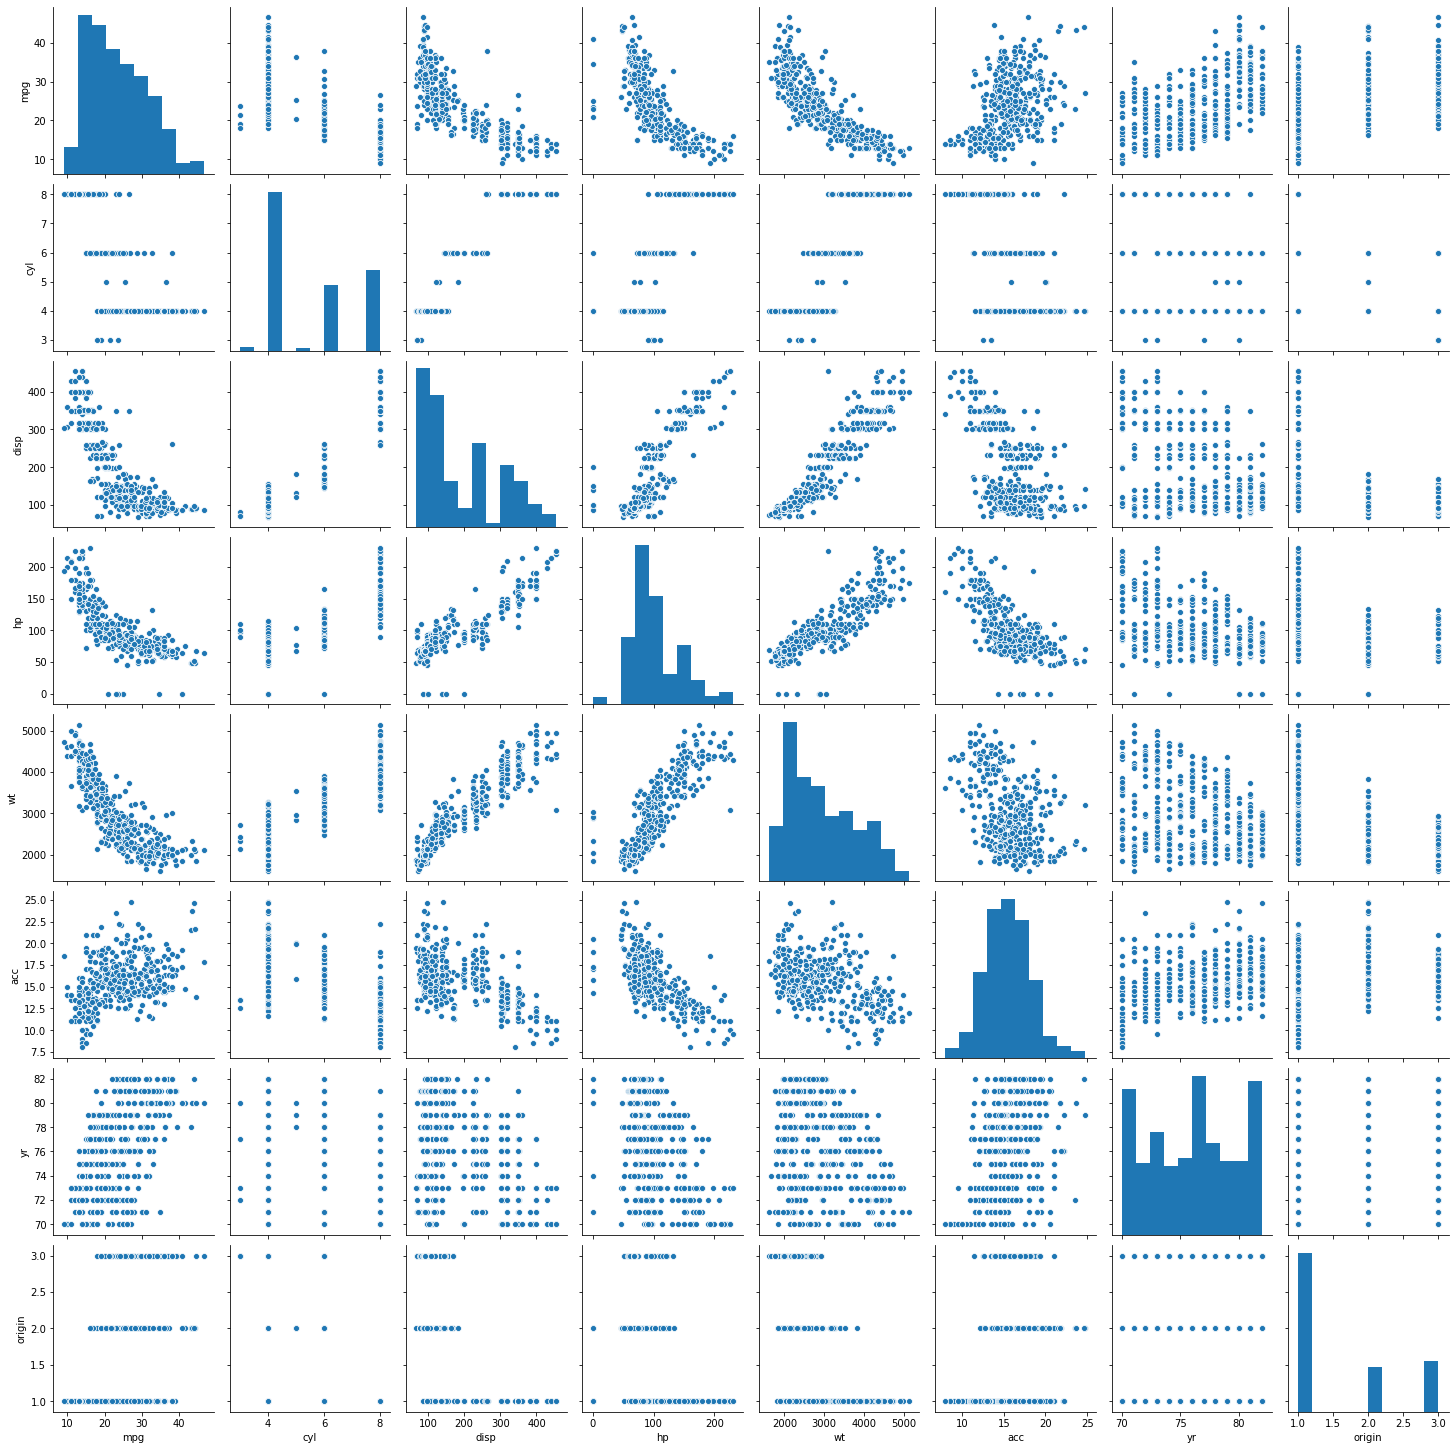

In [8]:
sns.pairplot(df)
plt.show()

### Inferences from the above graphs:
1) Acceleration(acc) is following Normal distribution.                
2) Disp and WT have linear relationship.       
3) mpg and disp are negatively correlated.  
4) hp,disp and acc are linearly related.

### 2. Perform One Hot Encoding on Categorical Variable i.e on Year & Origin
(Consider MPG as Target Variable)

In [9]:
df2 = pd.get_dummies(df,drop_first =True,columns=['yr','origin'])
df2.head()

,mpg,cyl,disp,hp,wt,acc,car_name,yr_71,yr_72,yr_73,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,buick skylark 320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,plymouth satellite,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,amc rebel sst,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,ford torino,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Extract Features

In [10]:
# Drop feature carname and conider MPG as Target variable

x = df2.drop(['mpg','car_name'],axis = 1)
y = df2['mpg']

In [11]:
x.head()

,cyl,disp,hp,wt,acc,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,origin_2,origin_3
0,8,307.0,130,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,304.0,150,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

### 4. Split Data into Train and Test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=2)

In [14]:
print("x_train : ",x_train.shape)
print("x_test  : ",x_test.shape)

print("-"*40)
print("y_train : ",y_train.shape)
print("y_test  : ",y_test.shape)

x_train :  (278, 19)
x_test  :  (120, 19)
----------------------------------------
y_train :  (278,)
y_test  :  (120,)


## Build Linear Regression Model
### Import the required libraries

In [15]:
from sklearn.linear_model import LinearRegression

### Instantiating and Fitting the Data

In [16]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Train Score :',model.score(x_train,y_train))
print('Test Score :',model.score(x_test,y_test))

Train Score : 0.8454091649184475
Test Score : 0.854520918202233


In [18]:
print('No.of non-zero co-efficients :',np.count_nonzero(model.coef_,0))

No.of non-zero co-efficients : 19


In [19]:
model.coef_

array([-9.20597317e-02,  1.76141820e-02,  5.25788920e-03, -7.22262957e-03,
        1.67982151e-01,  1.55032241e+00,  3.07210325e-02, -1.37871997e-01,
        2.43893250e+00,  1.38592931e+00,  1.57345313e+00,  3.93505955e+00,
        4.28251922e+00,  6.10926350e+00,  9.61294434e+00,  7.06401212e+00,
        9.03286920e+00,  3.61525320e+00,  2.37019490e+00])

## Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
cv_5 = cross_val_score(model, x, y, cv=5)
cv_5

array([ 0.55503577,  0.70765209,  0.69207697,  0.28938529, -0.81802675])

In [21]:
cv_5.mean()

0.28522467600177287

In [22]:
cv_10 = cross_val_score(model, x, y, cv=10)
cv_10

array([ 0.42491287,  0.81878527,  0.55382561,  0.73150567,  0.74172025,
        0.70344148,  0.35401706,  0.22307745,  0.22469874, -1.19184691])

In [23]:
cv_10.mean()

0.3584137481792711

## Regularization Technique
### 1. Lasso  Linear Regression

In [24]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)
print('Train Score :',model.score(x_train,y_train))
print('Test Score :',model.score(x_test,y_test))
print('No.of non-zero co-efficients :',np.count_nonzero(model.coef_,0))

Train Score : 0.6975013809437736
Test Score : 0.7158944556180464
No.of non-zero co-efficients : 3


### 2. Ridge Linear Regression

In [25]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
print('Train Score :',model.score(x_train,y_train))
print('Test Score :',model.score(x_test,y_test))
print('No.of non-zero co-efficients :',np.count_nonzero(model.coef_,0))

Train Score : 0.8421417469318613
Test Score : 0.853354832449232
No.of non-zero co-efficients : 19


## Comparing Performance of All Models

In [26]:
!pip install PrettyTable

In [27]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Simple LR',0.84,0.85])
x.add_row(['Lasso LR',0.690,0.71])
x.add_row(['Ridge LR',0.84,0.85])

print(x)

+-----------+-------------+------------+
|   Model   | Train Score | Test Score |
+-----------+-------------+------------+
| Simple LR |     0.84    |    0.85    |
|  Lasso LR |     0.69    |    0.71    |
|  Ridge LR |     0.84    |    0.85    |
+-----------+-------------+------------+


Clearly, Simple Linear Regression and Ridge Linear Regression are performing better.